# Task1: IBM HR Attrition

In [30]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
np.random.seed(0)
warnings.filterwarnings("ignore")

Below is a brief description of each feature:

    AGE: The age of the employee.
    ATTRITION: A binary feature indicating whether the employee has left the company (1) or not (0).
    BUSINESS TRAVEL: The frequency of business travel undertaken by the employee (No travel, Travel Frequently, Travel Rarely).
    DAILY RATE: The employee's daily rate or salary level.
    DEPARTMENT: The department in which the employee works (HR, R&D, Sales).
    DISTANCE FROM HOME: The distance between the employee's home and the workplace.
    EDUCATION: The highest level of education attained by the employee.
    EDUCATION FIELD: The field of education of the employee (HR, Life Sciences, Marketing, Medical Sciences, Others, Technical).
    EMPLOYEE COUNT: The number of employees in the company.
    EMPLOYEE NUMBER: The unique identifier assigned to each employee.
    ENVIRONMENT SATISFACTION: The employee's level of satisfaction with the work environment.
    GENDER: The gender of the employee.
    HOURLY RATE: The employee's hourly rate or salary level.
    JOB INVOLVEMENT: The employee's level of involvement in their job.
    JOB LEVEL: The level of the employee's job in the company.
    JOB ROLE: The specific role of the employee in their department.
    JOB SATISFACTION: The employee's level of satisfaction with their job.
    MARITAL STATUS: The marital status of the employee.
    MONTHLY INCOME: The employee's monthly income or salary level.
    MONTHLY RATE: The employee's monthly rate or salary level.
    NUMCOMPANIES WORKED: The number of companies the employee has worked at prior to joining the current company.
    OVER 18: A binary feature indicating whether the employee is over 18 years of age (1) or not (0).
    OVERTIME: A binary feature indicating whether the employee works overtime (1) or not (0).
    PERCENT SALARY HIKE: The percentage increase in the employee's salary from the previous year.
    PERFORMANCE RATING: The employee's performance rating.
    RELATIONS SATISFACTION: The employee's level of satisfaction with their work relationships.
    STANDARD HOURS: The standard number of working hours in the company.
    STOCK OPTIONS LEVEL: The level of stock options owned by the employee in the company.
    TOTAL WORKING YEARS: The total number of years the employee has worked.
    TRAINING TIMES LAST YEAR: The number of hours the employee spent on training in the last year.
    WORK LIFE BALANCE: The employee's level of satisfaction with their work-life balance.
    YEARS AT COMPANY: The number of years the employee has worked for the current company.
    YEARS IN CURRENT ROLE: The number of years the employee has worked in their current role.
    YEARS SINCE LAST PROMOTION: The number of years since the employee's last promotion.
    YEARS WITH CURRENT MANAGER: The number of years the employee has worked under their current manager.

In [2]:
#loading dataset
attrition_data = pd.read_csv("IBM HR Employee Attrition.csv")

#fist look of dataset
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Data Statistics

* Using simple descriptive analytics; analyse the IBM Employee attrition dataset and provide a clear description of the data by Identifying the characteristics of the dataset and data quality.

---


In [3]:
#available columns
attrition_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# Describe the dataset
attrition_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [5]:
# Get the data types and missing values
print(attrition_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Data Visualisation

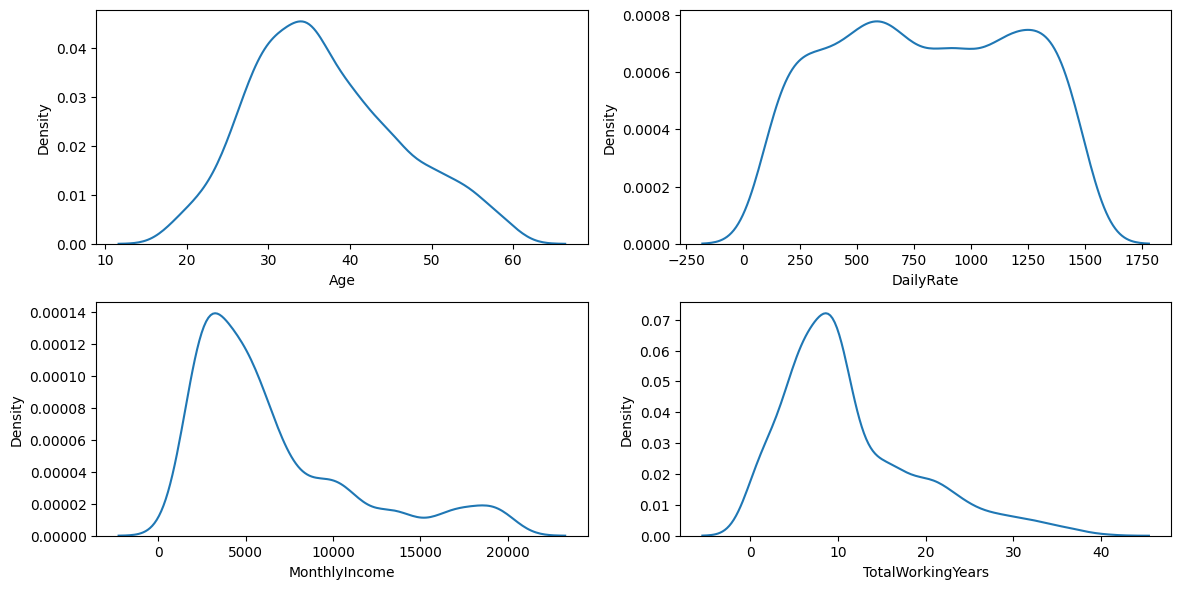

In [6]:
# create a 2x4 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# loop through the columns of the DataFrame, creating a KDE plot for each column
col_idx = 0
for row_idx in range(2):
    for col in axs[row_idx]:
        if col_idx < attrition_data[['Age', 'DailyRate', 'MonthlyIncome', 'TotalWorkingYears']].shape[1]:
            sns.kdeplot(data=attrition_data[['Age', 'DailyRate', 'MonthlyIncome', 'TotalWorkingYears']], 
                        x=attrition_data[['Age', 'DailyRate', 'MonthlyIncome', 'TotalWorkingYears']].columns[col_idx], ax=col)
            col_idx += 1
            
     

# adjust the layout of the subplots
plt.tight_layout()

# show the plot
plt.show()

In [7]:
# Calculate the average monthly income by attrition status
avg_income_by_attrition = attrition_data.groupby('Attrition')['MonthlyIncome'].mean()

# Calculate the proportion of employees who travel frequently or rarely by attrition status
prop_travel_by_attrition_temp = attrition_data['Attrition'].value_counts()
prop_travel_by_attrition_values = [prop_travel_by_attrition_temp.loc['Yes'], prop_travel_by_attrition_temp.loc['No']]
prop_travel_by_attrition_keys = ["Yes", "No"]

# Calculate the average years at company and years in current role by attrition status
avg_years_by_attrition = attrition_data.groupby('Attrition')['YearsAtCompany', 'YearsInCurrentRole'].mean()

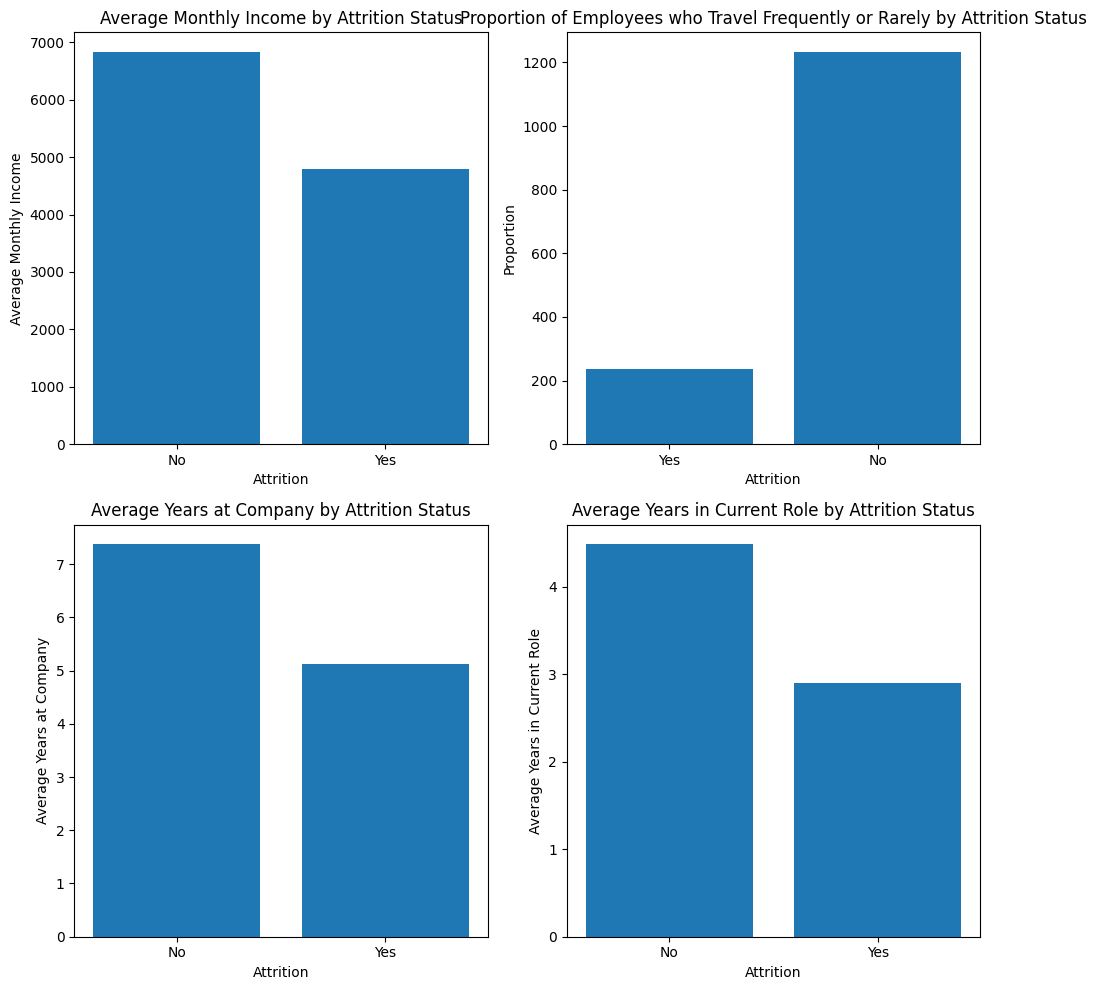

In [8]:
# Visualize the results
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot the average monthly income by attrition status
axs[0, 0].bar(avg_income_by_attrition.index, avg_income_by_attrition)
axs[0, 0].set_title('Average Monthly Income by Attrition Status')
axs[0, 0].set_xlabel('Attrition')
axs[0, 0].set_ylabel('Average Monthly Income')

# Plot the proportion of employees who travel frequently or rarely by attrition status
axs[0, 1].bar(prop_travel_by_attrition_keys, prop_travel_by_attrition_values)
axs[0, 1].set_title('Proportion of Employees who Travel Frequently or Rarely by Attrition Status')
axs[0, 1].set_xlabel('Attrition')
axs[0, 1].set_ylabel('Proportion')

# Plot the average years at company by attrition status
axs[1, 0].bar(avg_years_by_attrition.index, avg_years_by_attrition['YearsAtCompany'])
axs[1, 0].set_title('Average Years at Company by Attrition Status')
axs[1, 0].set_xlabel('Attrition')
axs[1, 0].set_ylabel('Average Years at Company')

# Plot the average years in current role by attrition status
axs[1, 1].bar(avg_years_by_attrition.index, avg_years_by_attrition['YearsInCurrentRole'])
axs[1, 1].set_title('Average Years in Current Role by Attrition Status')
axs[1, 1].set_xlabel('Attrition')
axs[1, 1].set_ylabel('Average Years in Current Role')

plt.tight_layout()
plt.show()

* Using data exploratory techniques; explore the dataset to find the relationship between features and patterns.


---




#### Univariate

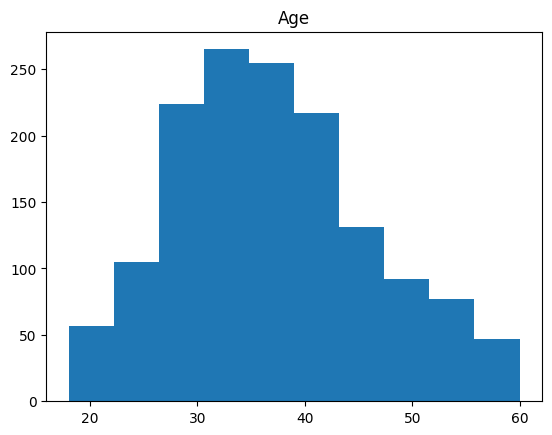

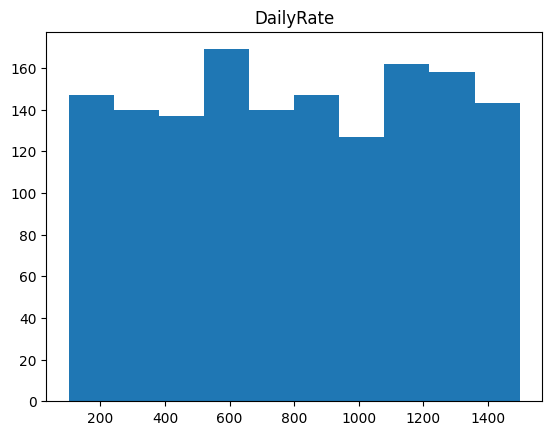

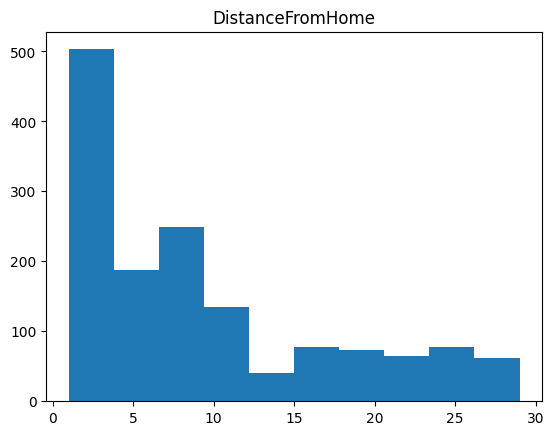

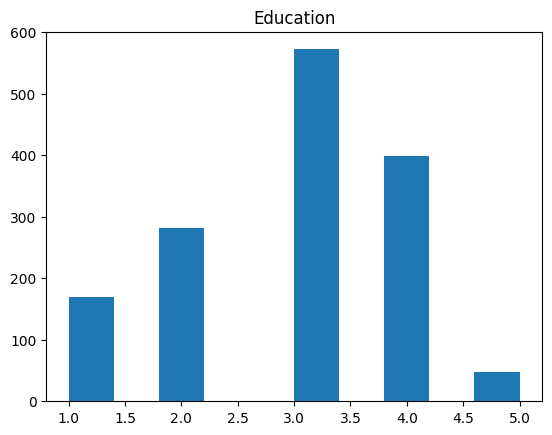

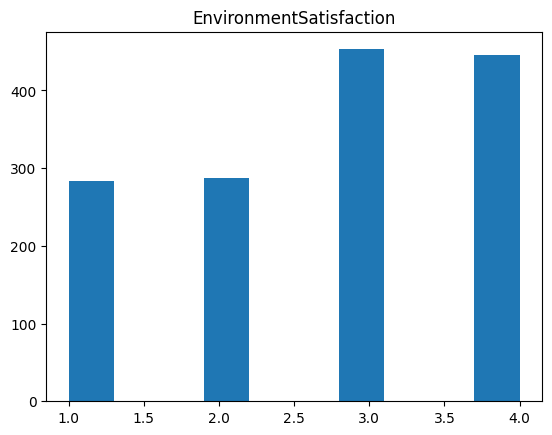

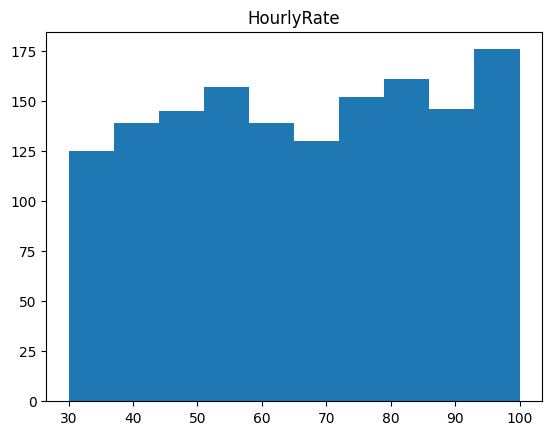

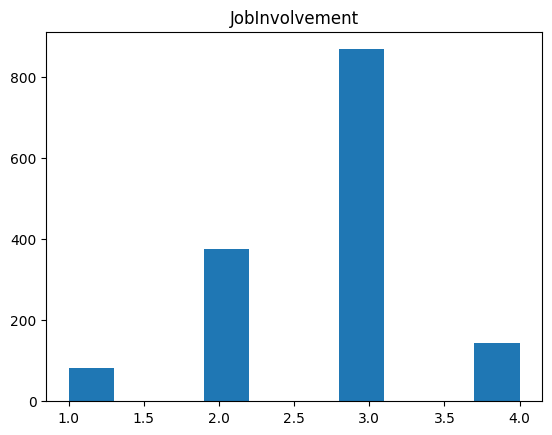

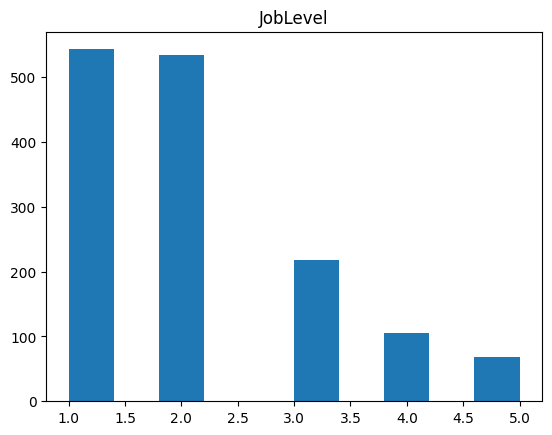

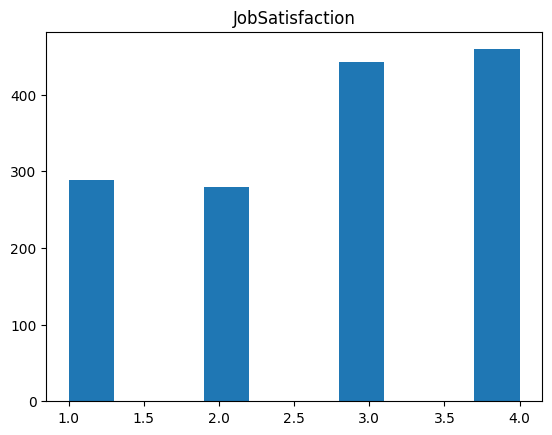

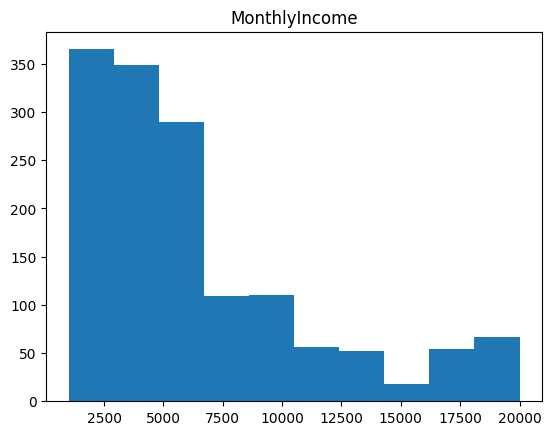

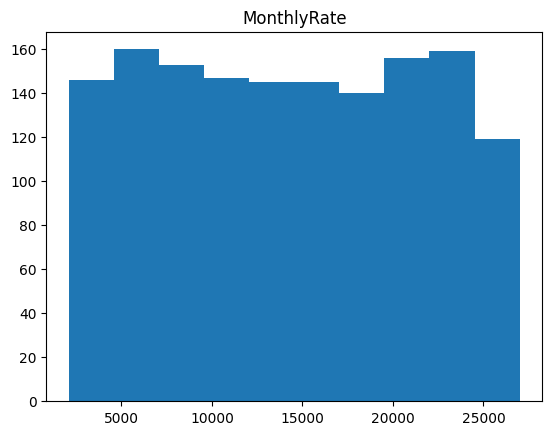

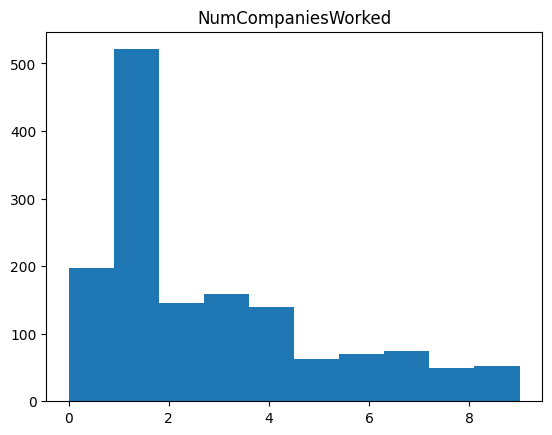

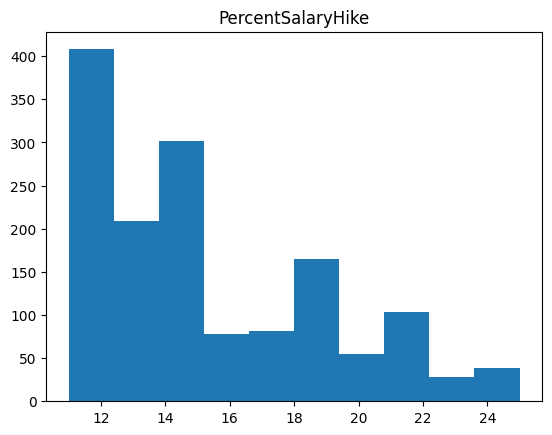

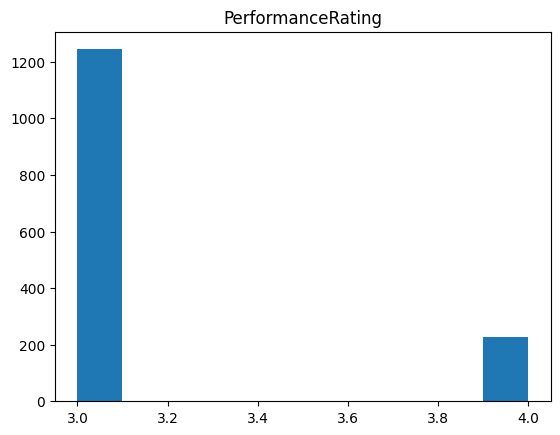

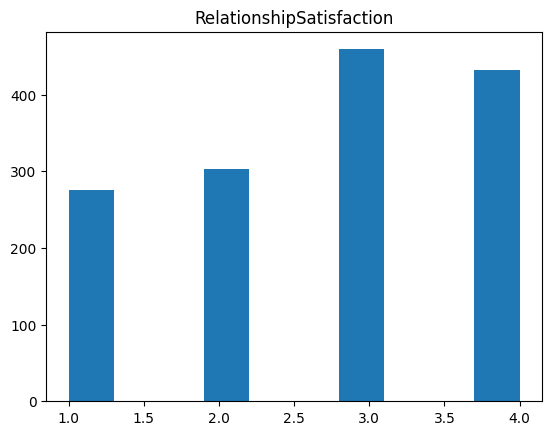

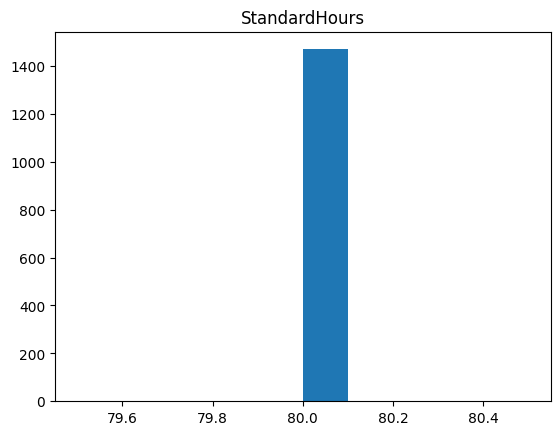

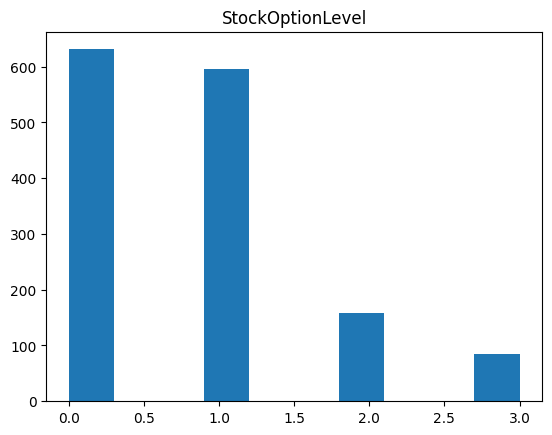

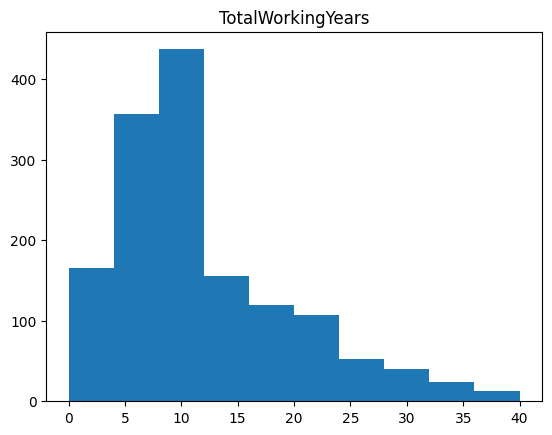

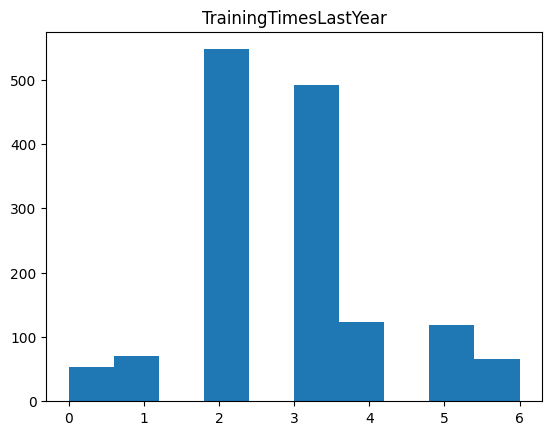

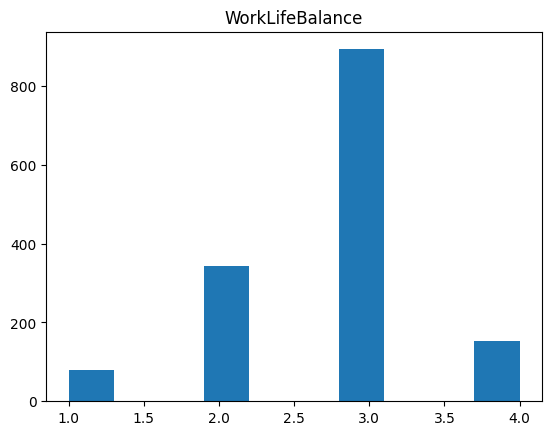

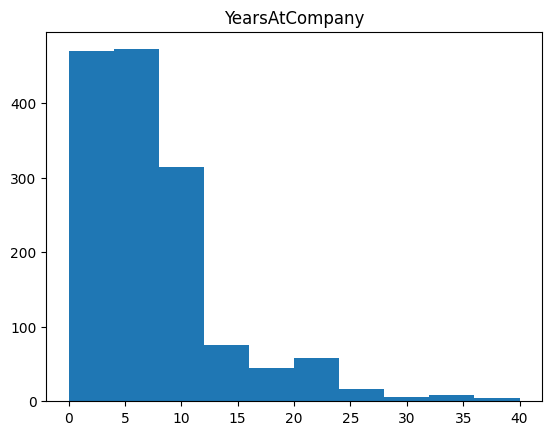

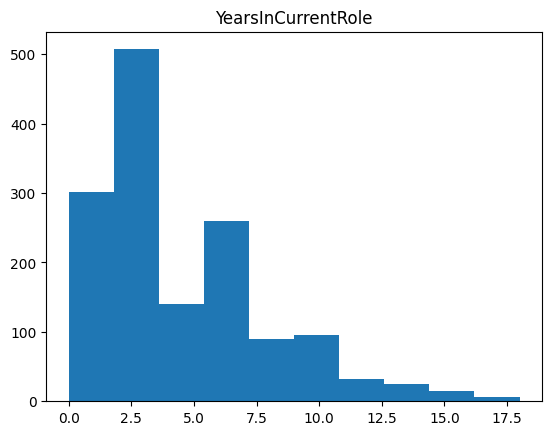

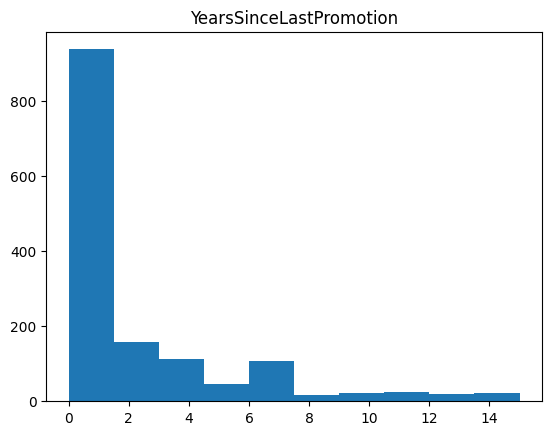

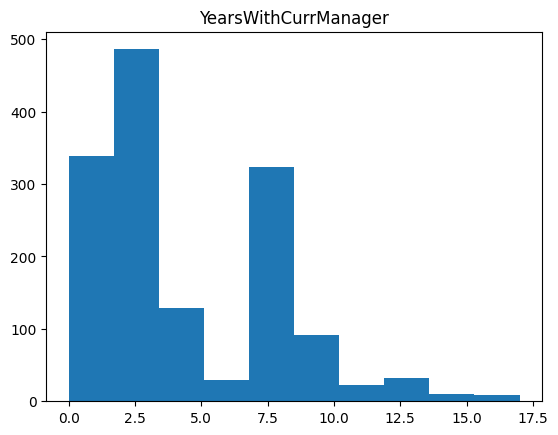

In [9]:
# Numerical features
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
                      'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                      'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                      'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 
                      'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
                      'YearsSinceLastPromotion', 'YearsWithCurrManager']

for feature in numerical_features:
    plt.hist(attrition_data[feature])
    plt.title(feature)
    plt.show()

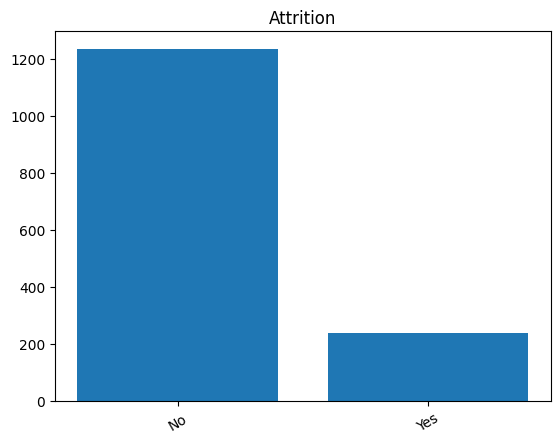

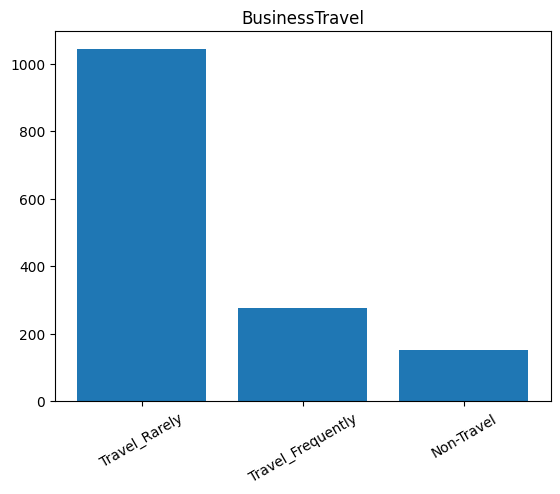

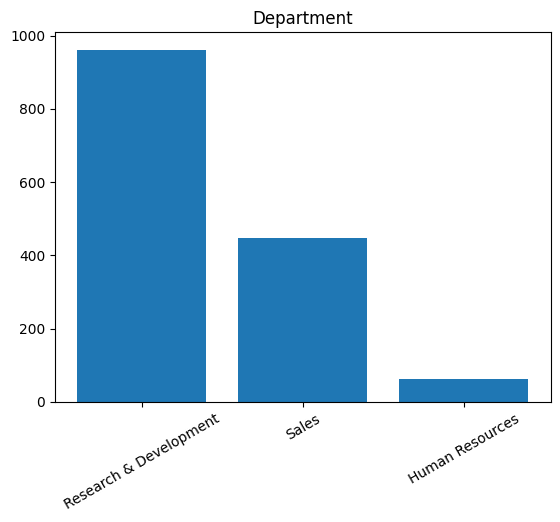

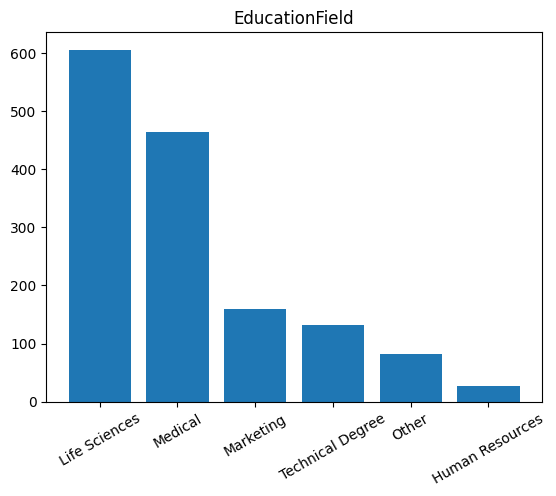

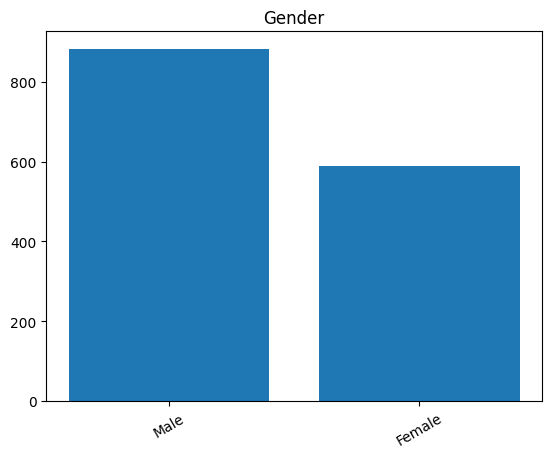

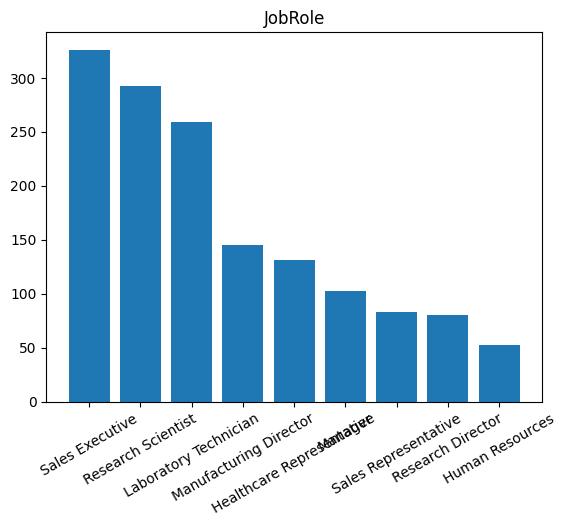

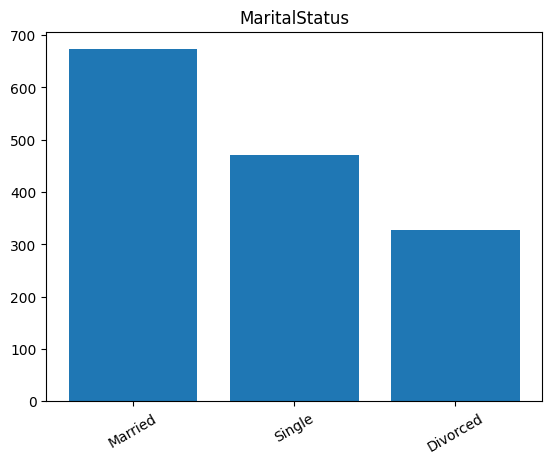

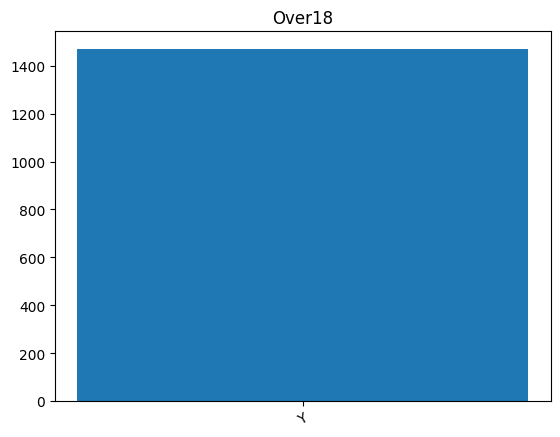

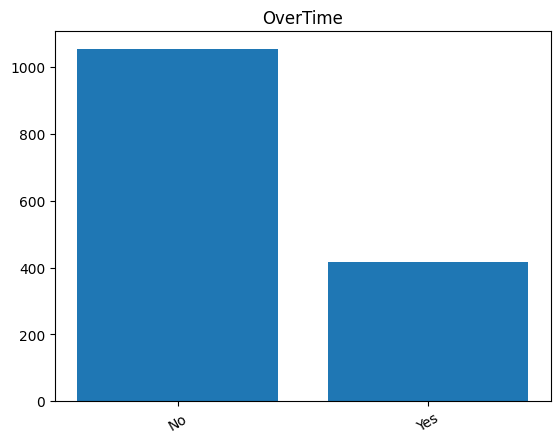

In [10]:
# Categorical features
categorical_features = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 
                        'MaritalStatus', 'Over18', 'OverTime']

for feature in categorical_features:
    plt.bar(attrition_data[feature].value_counts().index, attrition_data[feature].value_counts().values)
    plt.xticks(rotation=30)
    plt.title(feature)
    plt.show()

Text(0.5, 1.0, 'Attrition')

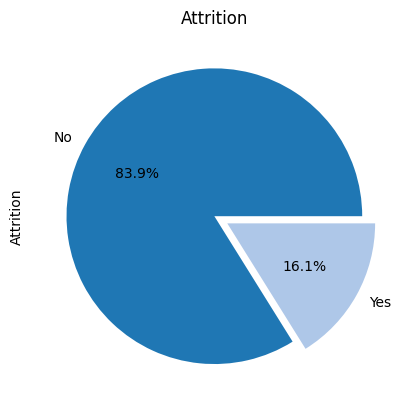

In [11]:
# count the number of 'Yes' and 'No' values in the 'Attrition' column
attrition_counts = attrition_data['Attrition'].value_counts()

# plot a pie chart with blue colors for the 'Attrition' column
colors = ['#1f77b4', '#aec7e8']
attrition_counts.plot(kind='pie', colors=colors, autopct='%1.1f%%', explode=[0,0.1])

# set the title of the plot
plt.title('Attrition')

#### Multivariate

In [12]:
# Plot a pair plot of some features
sns.pairplot(attrition_data, hue='Attrition')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

* Utilize the correlation matrix to extract the features that were not significantly correlated with other attributes and remove them from the dataset.


---

In [13]:
attrition_data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


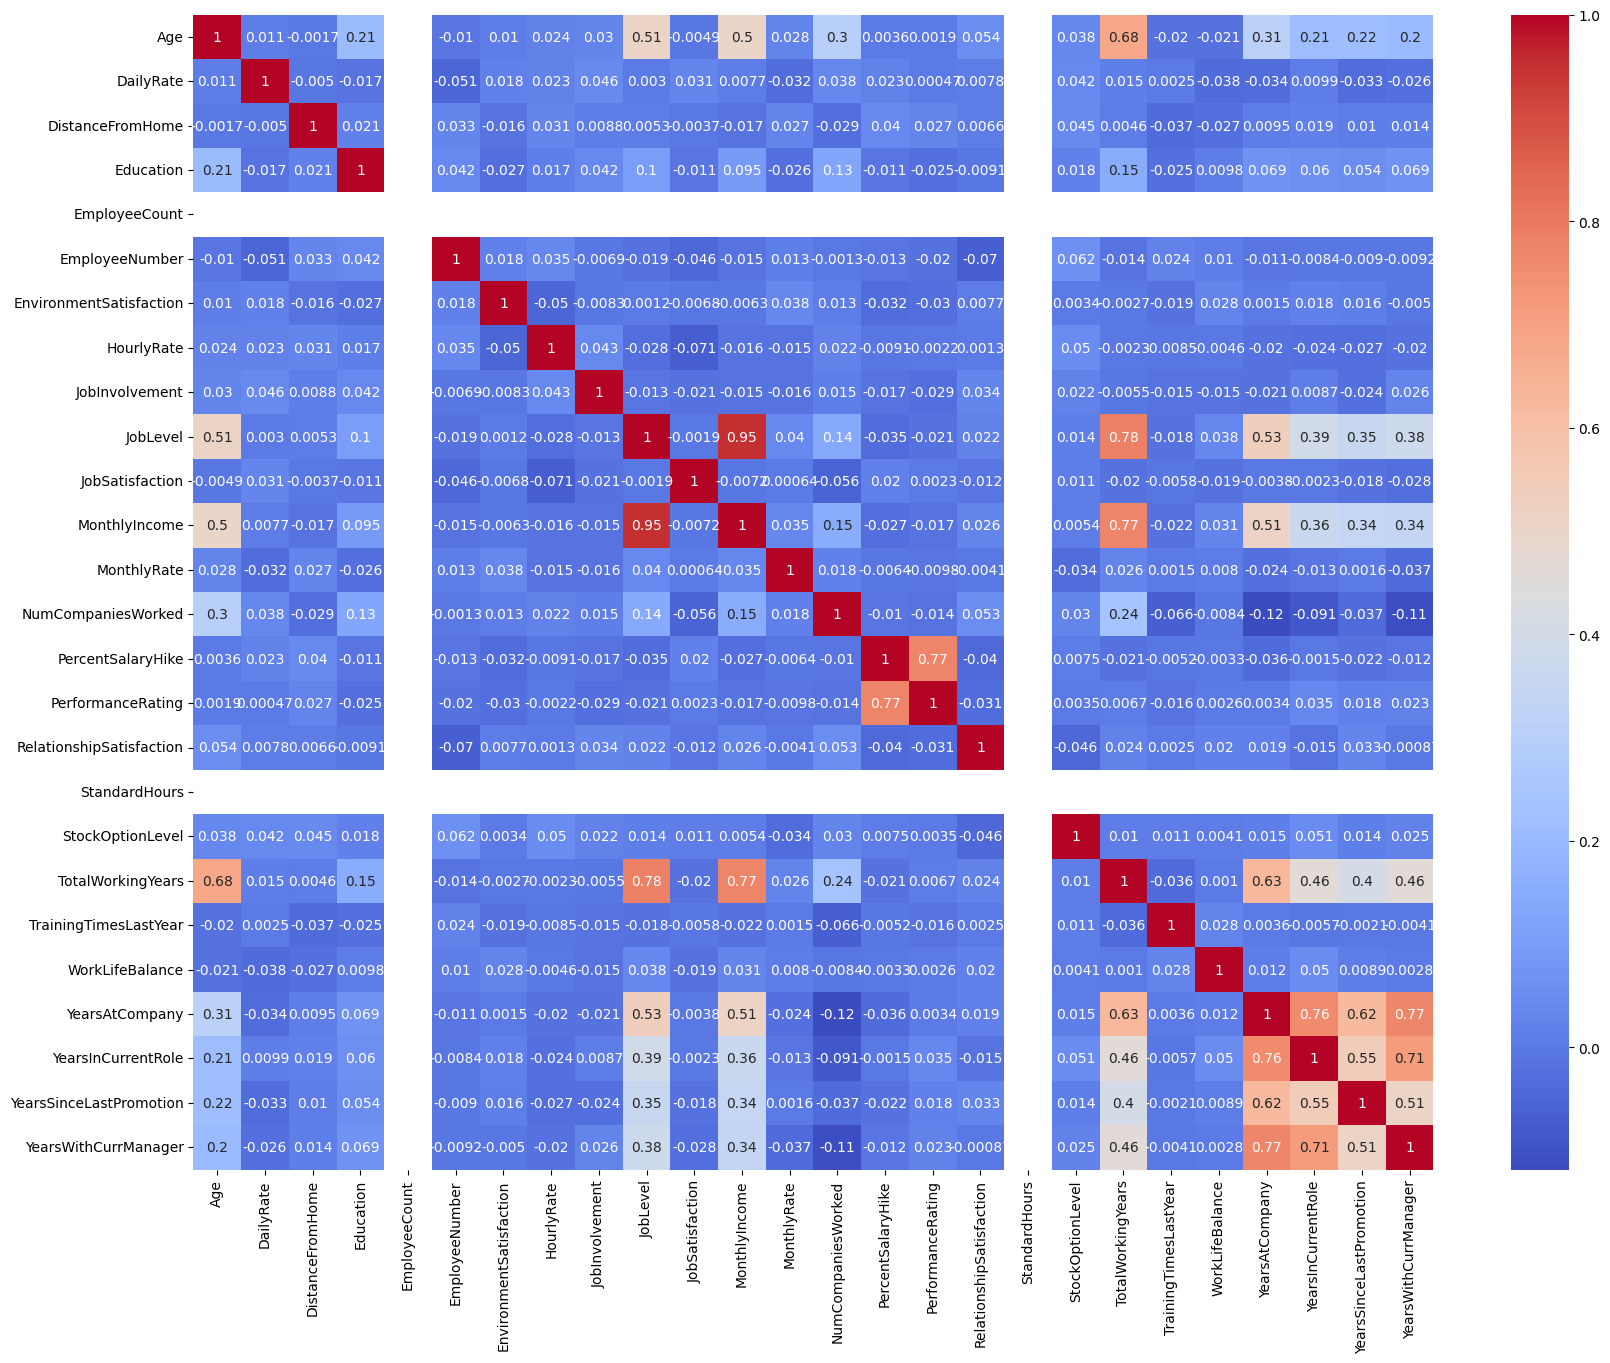

In [14]:
# Calculate the correlation matrix
corr = attrition_data.corr()

# create a larger figure
fig, ax = plt.subplots(figsize=(20, 15))

# create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
plt.show()

### Features Extraction

* Select important features that significantly impacted employee attrition. 


---


#### Using Correlation Matrix

In [15]:
#Correlation matrix with their absolute values
cor_matrix = attrition_data.corr().abs()

#Usage of upper triangle
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

#Identifing highly correlated features
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
to_drop

['MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

#### Using Random Forest

In [16]:
#Label Encoder to encode categorical string values into integer values

# Create an instance of the LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical features
attrition_data['BusinessTravel'] = label_encoder.fit_transform(attrition_data['BusinessTravel'])
attrition_data['Department'] = label_encoder.fit_transform(attrition_data['Department'])
attrition_data['EducationField'] = label_encoder.fit_transform(attrition_data['EducationField'])
attrition_data['Gender'] = label_encoder.fit_transform(attrition_data['Gender'])
attrition_data['JobRole'] = label_encoder.fit_transform(attrition_data['JobRole'])
attrition_data['MaritalStatus'] = label_encoder.fit_transform(attrition_data['MaritalStatus'])
attrition_data['Over18'] = label_encoder.fit_transform(attrition_data['Over18'])
attrition_data['OverTime'] = label_encoder.fit_transform(attrition_data['OverTime'])
attrition_data['Attrition'] = label_encoder.fit_transform(attrition_data['OverTime'])

#seperating dependent and independent variables
X = attrition_data.drop('Attrition', axis=1)
y = attrition_data['Attrition']

In [17]:
# create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the data
rfc.fit(X, y)

# get the feature importances from the model
feature_importances = rfc.feature_importances_

# create a dictionary of feature names and importances
feature_importances_dict = dict(zip(X.columns, feature_importances))

# sort the features by importance, in descending order
sorted_features_rf = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)

# print the sorted list of features and their importances
for feature in sorted_features_rf:
    print(f"{feature[0]}: {feature[1]}")

OverTime: 0.7630543818857508
EmployeeNumber: 0.0173377079565926
MonthlyRate: 0.01651493347704309
MonthlyIncome: 0.01624563295702808
DailyRate: 0.01611330729941359
HourlyRate: 0.014496049807274656
Age: 0.013120936658342193
YearsAtCompany: 0.01196580298722612
DistanceFromHome: 0.011393590134866408
PercentSalaryHike: 0.010038995800395368
TotalWorkingYears: 0.009417343392906119
TrainingTimesLastYear: 0.008282459849599603
YearsWithCurrManager: 0.008102138575652396
YearsInCurrentRole: 0.007321646655608641
JobRole: 0.006801627636499357
EnvironmentSatisfaction: 0.006338547280284032
NumCompaniesWorked: 0.006293074946497876
YearsSinceLastPromotion: 0.006211517722791761
JobSatisfaction: 0.005827336861997075
Education: 0.005570777423668769
StockOptionLevel: 0.004882950809979434
EducationField: 0.004657340022982464
JobInvolvement: 0.004600429880276633
RelationshipSatisfaction: 0.004538867110836338
JobLevel: 0.004142564987106991
MaritalStatus: 0.004106857086935744
WorkLifeBalance: 0.0037255789134649

In [18]:
rf_to_drop = []
for i in range(len(sorted_features_rf)):
  if(sorted_features_rf[i][1]==0):
    rf_to_drop.append(sorted_features_rf[i][0])
rf_to_drop

['EmployeeCount', 'Over18', 'StandardHours']

In [19]:
X = X.drop(to_drop, axis=1)

#### Data Splitting

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

### Modelling

#### Support Vector Machine

Accuracy: 0.717687074829932
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       211
           1       0.00      0.00      0.00        83

    accuracy                           0.72       294
   macro avg       0.36      0.50      0.42       294
weighted avg       0.52      0.72      0.60       294

ROC AUC Score: 0.5
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0


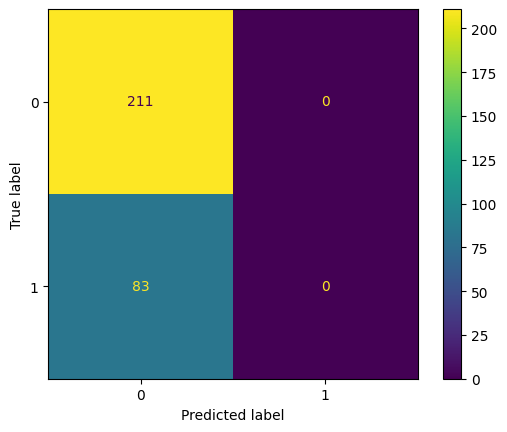

In [ ]:
# Create an Support Vector Machine model
from sklearn.svm import SVC
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc.predict(X_test)

# Evaluate the model
svc_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", svc_acc)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

#### Naive Bayes

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00        83

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

ROC AUC Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0


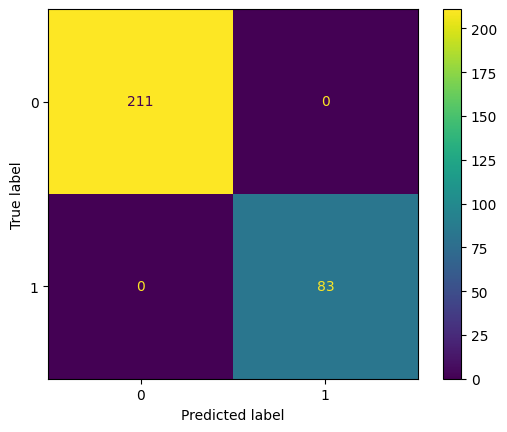

In [32]:
# Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Training the model over the 80% train data
gnb.fit(X_train, y_train)

# Predicting the results on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
gnb_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", gnb_acc)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

#### Decision Tree Classifier

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00        83

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

ROC AUC Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0


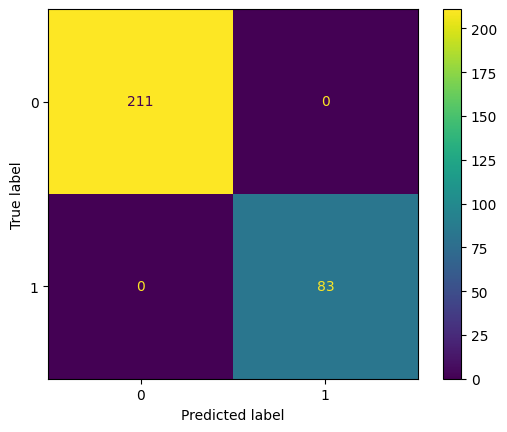

In [33]:
from sklearn.tree import DecisionTreeClassifier
# Create a DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the model
dt_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_acc)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

#### Random Forest Classifier

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00        83

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

ROC AUC Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0


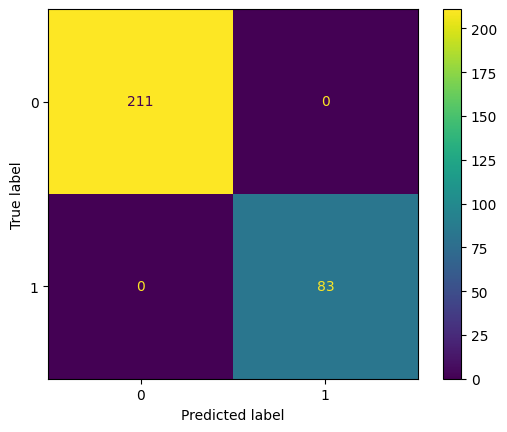

In [34]:
# Create a Random Forest model
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
rf_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_acc)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00        83

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

ROC AUC Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0


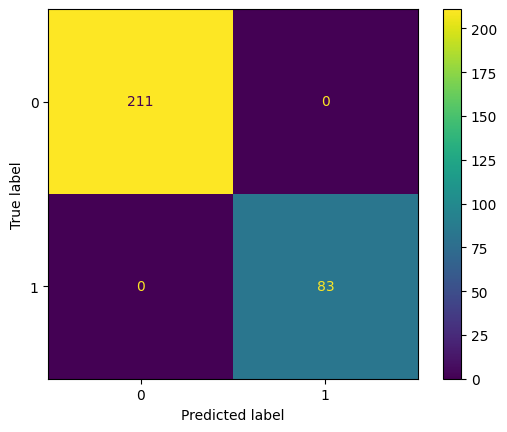

In [29]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Initialize the MLP classifier
rf = RandomForestClassifier()

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)

# Train the MLP classifier with the best hyperparameters
rf_best = RandomForestClassifier( **grid_search.best_params_)
rf_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_best.predict(X_test)

# Evaluate the model
tuned_rf_acc = accuracy_score(y_test, y_pred)
print("Tuned Accuracy:", tuned_rf_acc)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

### Clustering

* Build two different clustering models to identify the patterns and characteristics that lead to employee attrition.


---


#### KMeans

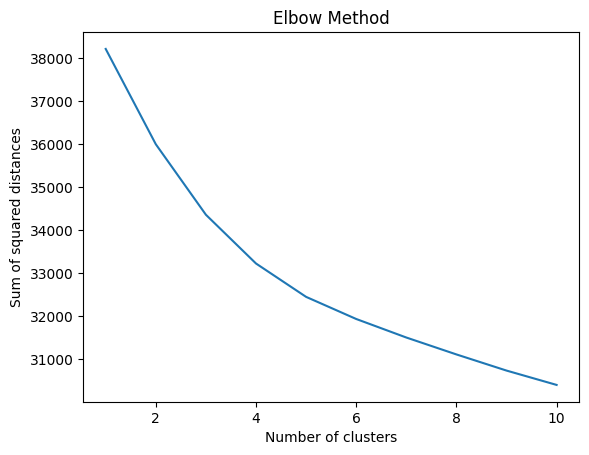

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow
plt.plot(range(1, 11), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()


KMeans Silhouette score: 0.359


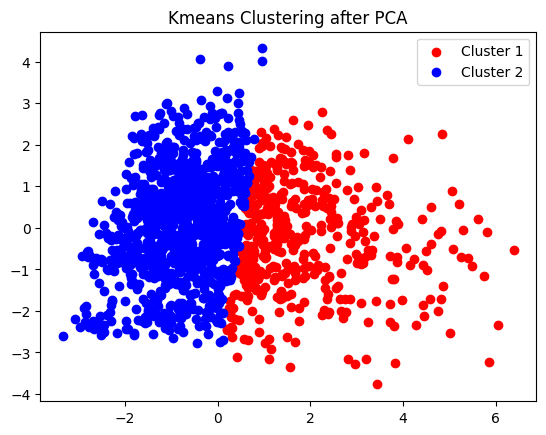

In [47]:
# K-means clustering with k=2
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=42).fit(X_reduced)
labels = kmeans.labels_

#evaluation
kmeans_score = silhouette_score(X_reduced, kmeans.labels_)
print(f"KMeans Silhouette score: {kmeans_score:.3f}")

# Plot the clusters
plt.scatter(X_reduced[labels==0, 0], X_reduced[labels==0, 1], c='red', label='Cluster 1')
plt.scatter(X_reduced[labels==1, 0], X_reduced[labels==1, 1], c='blue', label='Cluster 2')

plt.legend()
plt.title('Kmeans Clustering after PCA')
plt.show()


#### AgglomerativeClustering

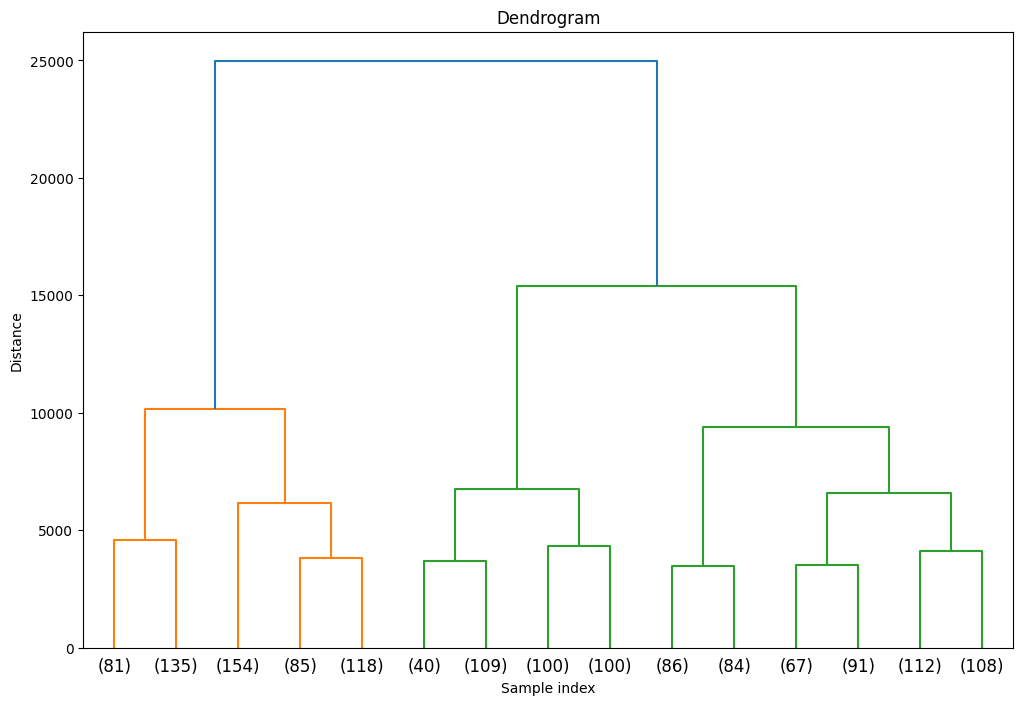

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering using the complete linkage method
linkage_matrix = linkage(X, 'complete')

# Plot the dendrogram to identify the optimal number of clusters
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=15)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

Agglomerative clustering Silhouette score: 0.431


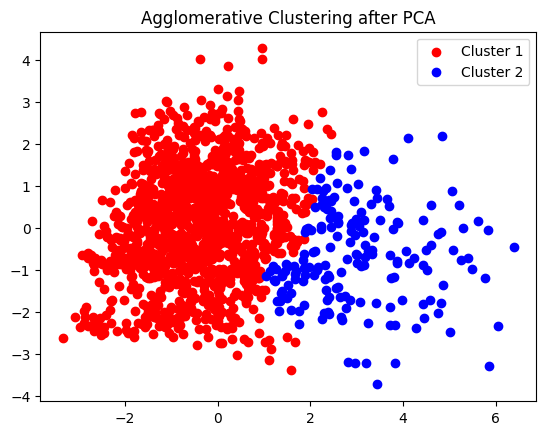

In [49]:
# Cut the dendrogram to obtain clusters
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

aggclustering = AgglomerativeClustering(n_clusters=2).fit(X_reduced)
labels = aggclustering.labels_

#evaluation
agglo_score = silhouette_score(X_reduced, aggclustering.labels_)
print(f"Agglomerative clustering Silhouette score: {agglo_score:.3f}")

# Plot the clusters
plt.scatter(X_reduced[labels==0, 0], X_reduced[labels==0, 1], c='red', label='Cluster 1')
plt.scatter(X_reduced[labels==1, 0], X_reduced[labels==1, 1], c='blue', label='Cluster 2')

plt.legend()
plt.title('Agglomerative Clustering after PCA')
plt.show()

### SMOTE

In [50]:
# SMOTE
from imblearn.over_sampling import SMOTE

# Instantiate a SMOTE object
smote = SMOTE()

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the number of samples in each class before and after applying SMOTE
print("Before SMOTE:")
print(y.value_counts())
print("After SMOTE:")
print(pd.Series(y_resampled).value_counts())

Before SMOTE:
0    1054
1     416
Name: Attrition, dtype: int64
After SMOTE:
1    1054
0    1054
Name: Attrition, dtype: int64


In [51]:
X=X_resampled
y=y_resampled

In [52]:
# X = X[important_features]

#### Data Splitting

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

### Modelling

#### Support Vector Machine

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50       211
           1       0.50      0.50      0.50       211

    accuracy                           0.50       422
   macro avg       0.50      0.50      0.50       422
weighted avg       0.50      0.50      0.50       422

ROC AUC Score: 0.5
F1 Score: 0.5011820330969267
Precision Score: 0.5
Recall Score: 0.5023696682464455


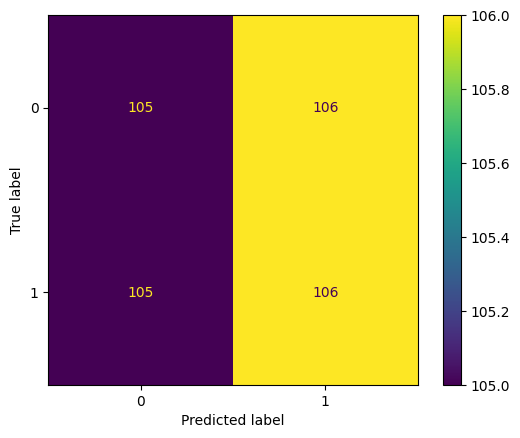

In [54]:
# Create an Support Vector Machine model
from sklearn.svm import SVC
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc.predict(X_test)

# Evaluate the model
svc_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", svc_acc)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

#### Naive Bayes

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       211

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

ROC AUC Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0


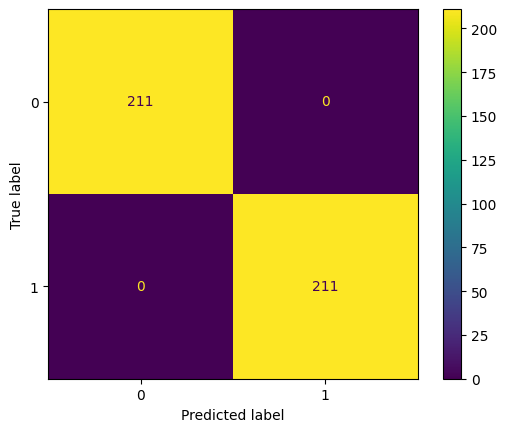

In [55]:
# Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Training the model over the 80% train data
gnb.fit(X_train, y_train)

# Predicting the results on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
gnb_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", gnb_acc)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

#### Decision Tree Classifier

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       211

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

ROC AUC Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0


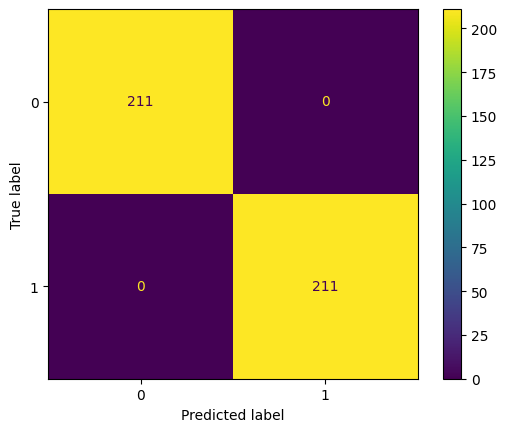

In [56]:
from sklearn.tree import DecisionTreeClassifier
# Create a DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the model
dt_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_acc)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

#### Random Forest Classifier

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       211

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

ROC AUC Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0


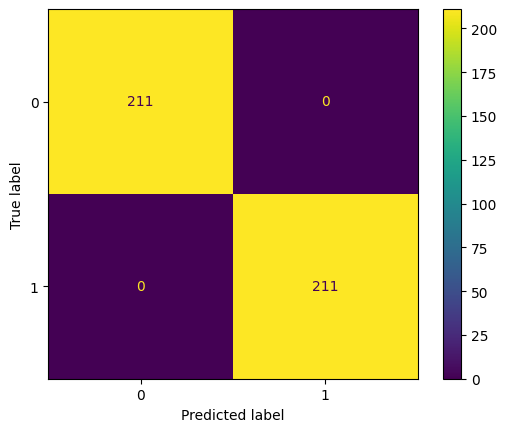

In [57]:
# Create a Random Forest model
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
rf_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_acc)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       211

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

ROC AUC Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0


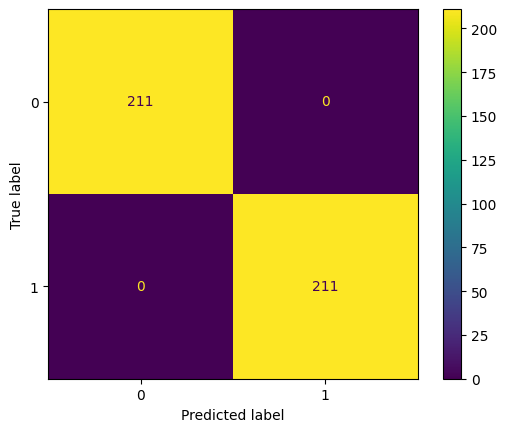

In [58]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Initialize the MLP classifier
rf = RandomForestClassifier()

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)

# Train the MLP classifier with the best hyperparameters
rf_best = RandomForestClassifier( **grid_search.best_params_)
rf_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_best.predict(X_test)

# Evaluate the model
tuned_rf_acc = accuracy_score(y_test, y_pred)
print("Tuned Accuracy:", tuned_rf_acc)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

### Clustering

* Build two different clustering models to identify the patterns and characteristics that lead to employee attrition.


---


#### KMeans

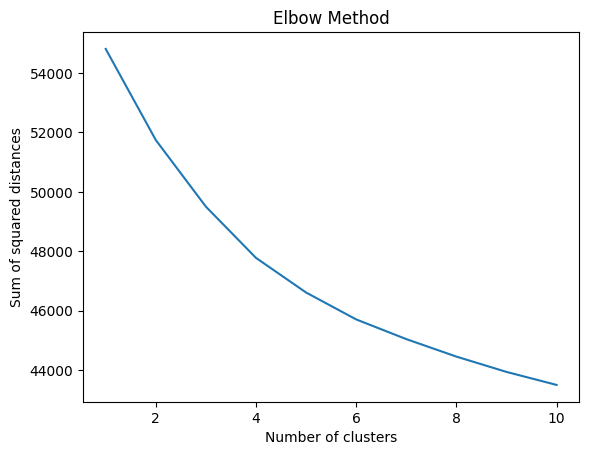

In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow
plt.plot(range(1, 11), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()


KMeans Silhouette score: 0.354


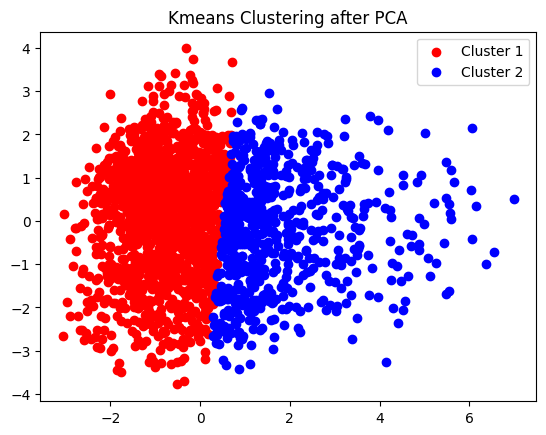

In [60]:
# K-means clustering with k=2
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=42).fit(X_reduced)
labels = kmeans.labels_

#evaluation
kmeans_score = silhouette_score(X_reduced, kmeans.labels_)
print(f"KMeans Silhouette score: {kmeans_score:.3f}")

# Plot the clusters
plt.scatter(X_reduced[labels==0, 0], X_reduced[labels==0, 1], c='red', label='Cluster 1')
plt.scatter(X_reduced[labels==1, 0], X_reduced[labels==1, 1], c='blue', label='Cluster 2')

plt.legend()
plt.title('Kmeans Clustering after PCA')
plt.show()


#### AgglomerativeClustering

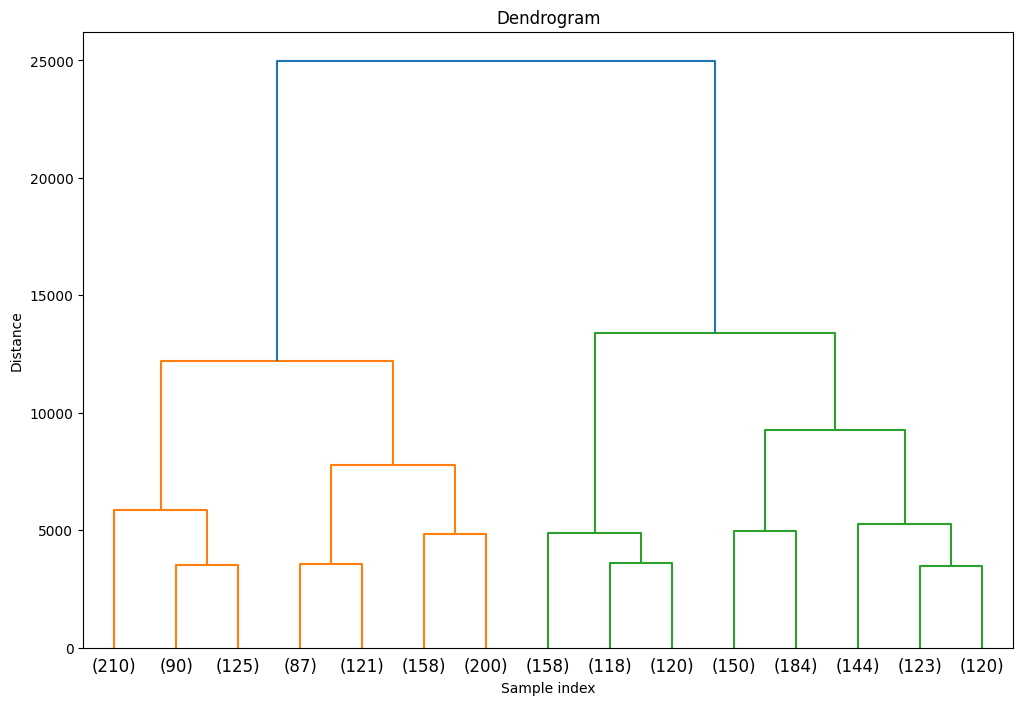

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering using the complete linkage method
linkage_matrix = linkage(X, 'complete')

# Plot the dendrogram to identify the optimal number of clusters
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=15)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

Agglomerative clustering Silhouette score: 0.282


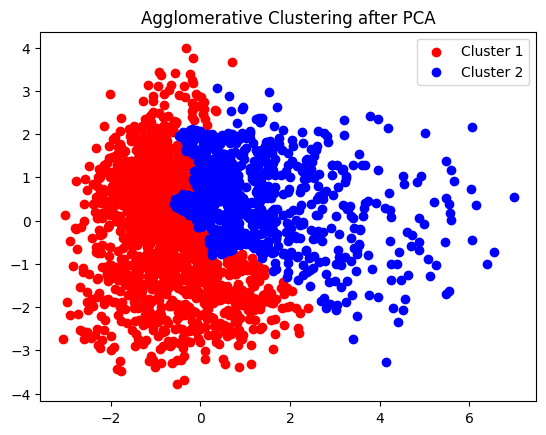

In [62]:
# Cut the dendrogram to obtain clusters
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

aggclustering = AgglomerativeClustering(n_clusters=2).fit(X_reduced)
labels = aggclustering.labels_

#evaluation
agglo_score = silhouette_score(X_reduced, aggclustering.labels_)
print(f"Agglomerative clustering Silhouette score: {agglo_score:.3f}")

# Plot the clusters
plt.scatter(X_reduced[labels==0, 0], X_reduced[labels==0, 1], c='red', label='Cluster 1')
plt.scatter(X_reduced[labels==1, 0], X_reduced[labels==1, 1], c='blue', label='Cluster 2')

plt.legend()
plt.title('Agglomerative Clustering after PCA')
plt.show()